In [1]:
import json
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


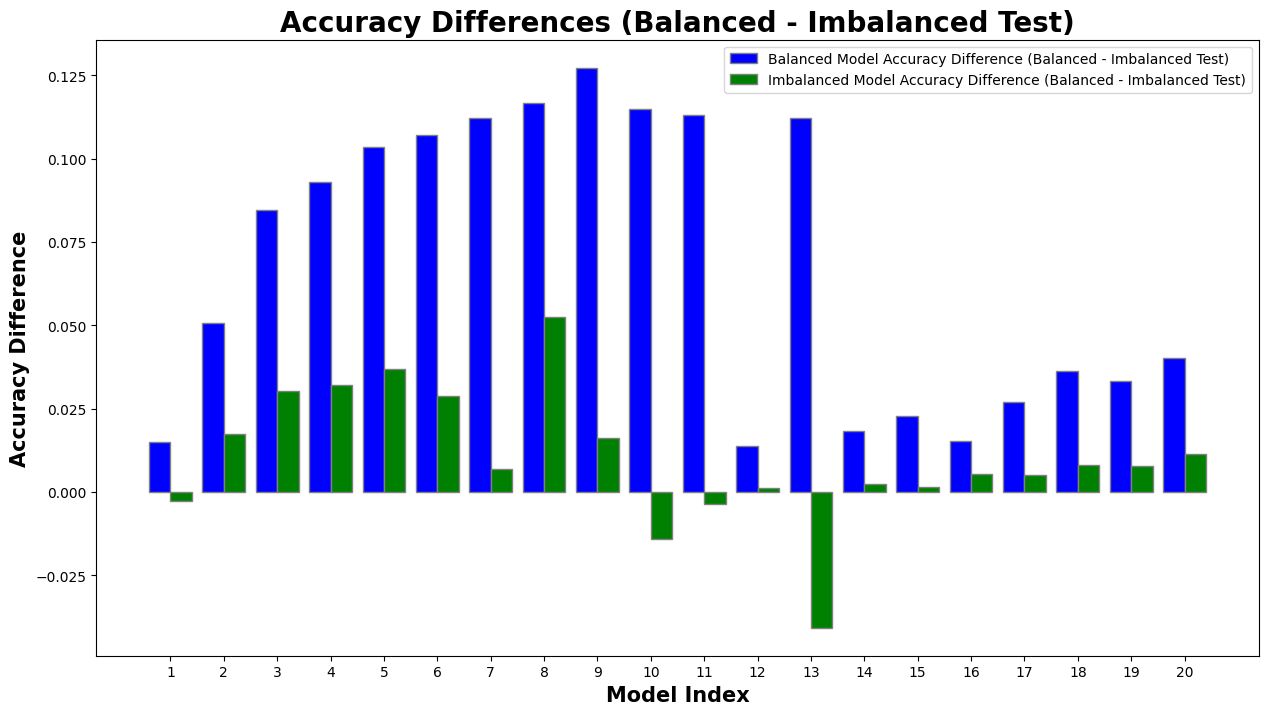

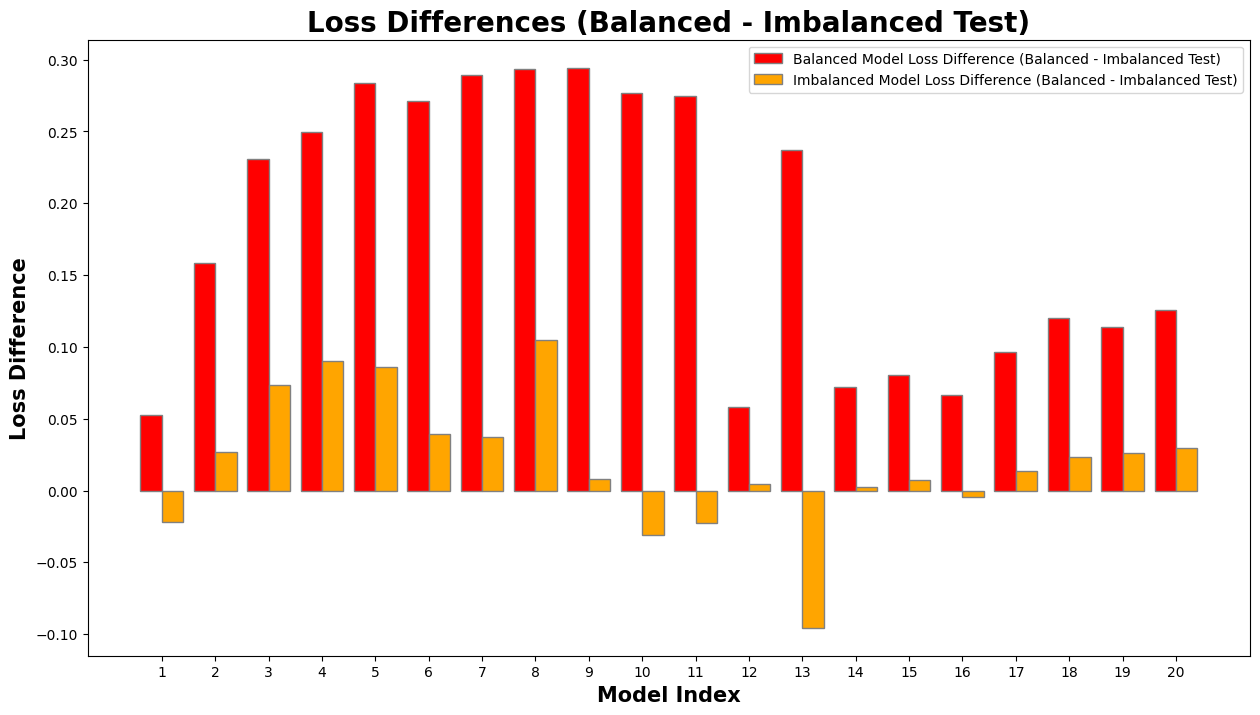

In [2]:
# plot the accuracy and loss difference between balanced and imbalanced test sets

# Load evaluation results from the JSON file
os.makedirs('performance_results', exist_ok=True)

# Construct the full path to the evaluation results file
fcn_evaluation_results = os.path.join('performance_results', 'evaluation_results.json')

with open(fcn_evaluation_results, 'r') as f:
    evaluation_results = json.load(f)

# Extract accuracy and loss data from the dictionary
balanced_model_balanced_test_accuracy = evaluation_results['balanced_model']['balanced_test']['accuracy']
balanced_model_imbalanced_test_accuracy = evaluation_results['balanced_model']['imbalanced_test']['accuracy']
imbalanced_model_balanced_test_accuracy = evaluation_results['imbalanced_model']['balanced_test']['accuracy']
imbalanced_model_imbalanced_test_accuracy = evaluation_results['imbalanced_model']['imbalanced_test']['accuracy']

balanced_model_balanced_test_loss = evaluation_results['balanced_model']['balanced_test']['loss']
balanced_model_imbalanced_test_loss = evaluation_results['balanced_model']['imbalanced_test']['loss']
imbalanced_model_balanced_test_loss = evaluation_results['imbalanced_model']['balanced_test']['loss']
imbalanced_model_imbalanced_test_loss = evaluation_results['imbalanced_model']['imbalanced_test']['loss']

# Compute differences
accuracy_diff_balanced = np.array(balanced_model_balanced_test_accuracy) - np.array(balanced_model_imbalanced_test_accuracy)
accuracy_diff_imbalanced = np.array(imbalanced_model_balanced_test_accuracy) - np.array(imbalanced_model_imbalanced_test_accuracy)

# filp the sign of the loss difference to match the accuracy difference
loss_diff_balanced = -(np.array(balanced_model_balanced_test_loss) - np.array(balanced_model_imbalanced_test_loss))
loss_diff_imbalanced = -(np.array(imbalanced_model_balanced_test_loss) - np.array(imbalanced_model_imbalanced_test_loss))


model_indices = list(range(1, len(balanced_model_balanced_test_accuracy) + 1)) # Model indices

# Plot 1: Accuracy difference bar chart
fig1, ax1 = plt.subplots(figsize=(15, 8))
bar_width = 0.4
r1 = np.arange(len(model_indices))
r2 = [x + bar_width for x in r1]

ax1.bar(r1, accuracy_diff_balanced, color='blue', width=bar_width, edgecolor='grey', label='Balanced Model Accuracy Difference (Balanced - Imbalanced Test)')
ax1.bar(r2, accuracy_diff_imbalanced, color='green', width=bar_width, edgecolor='grey', label='Imbalanced Model Accuracy Difference (Balanced - Imbalanced Test)')

ax1.set_xlabel('Model Index', fontweight='bold', fontsize=15)
ax1.set_ylabel('Accuracy Difference', fontweight='bold', fontsize=15)
ax1.set_title('Accuracy Differences (Balanced - Imbalanced Test)', fontweight='bold', fontsize=20)
ax1.set_xticks([r + bar_width / 2 for r in range(len(model_indices))])
ax1.set_xticklabels(model_indices)
ax1.legend()

# Plot 2: Loss difference bar chart
fig2, ax2 = plt.subplots(figsize=(15, 8))
r3 = np.arange(len(model_indices))
r4 = [x + bar_width for x in r3]

ax2.bar(r3, loss_diff_balanced, color='red', width=bar_width, edgecolor='grey', label='Balanced Model Loss Difference (Balanced - Imbalanced Test)')
ax2.bar(r4, loss_diff_imbalanced, color='orange', width=bar_width, edgecolor='grey', label='Imbalanced Model Loss Difference (Balanced - Imbalanced Test)')

ax2.set_xlabel('Model Index', fontweight='bold', fontsize=15)
ax2.set_ylabel('Loss Difference', fontweight='bold', fontsize=15)
ax2.set_title('Loss Differences (Balanced - Imbalanced Test)', fontweight='bold', fontsize=20)
ax2.set_xticks([r + bar_width / 2 for r in range(len(model_indices))])
ax2.set_xticklabels(model_indices)
ax2.legend()

# Show the plots
plt.show()






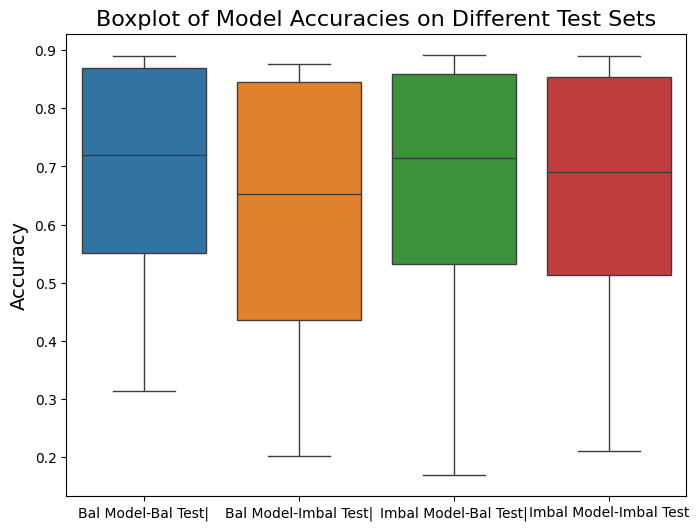

In [3]:
# box plot for 4 types of accuracy

data = {
    'Bal Model-Bal Test|': balanced_model_balanced_test_accuracy,
    'Bal Model-Imbal Test|': balanced_model_imbalanced_test_accuracy,
    'Imbal Model-Bal Test|': imbalanced_model_balanced_test_accuracy,
    'Imbal Model-Imbal Test': imbalanced_model_imbalanced_test_accuracy
}

df = pd.DataFrame(data)

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Model Accuracies on Different Test Sets', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.show()